# Part II - Explanatory Analysis of Loan Data from Prosper

## by Joachim Wambua

## Investigation Overview

#### Overall Goals of the presentation.
1. To understand the borrower and loan trends when Prosper offer's its loans to borrowers.
2. To identify the crucial features that affect the quality of loan a borrower receives.
3. To understand the underlying patterns in the Loaning System at Prosper.

#### Key Insights

During the analysis and visualization of Prosper's Loan Data, I found it imperative to evaluate the stand-out features that offered meaningful insight into the trends and patterns in the data. 

1. Features `CreditGrade` & `BorrowerRate` gave great insight into how a Loan borrower's Credit Score/ `CreditGrade` could impact their Loan's interest rates. These features exhibited a negative correlation as it was observed that the higher a borrower's Credit Score the lower the interest rates they receive in their loans.

2. The features `LoanOriginalAmount` & `BorrowerRate` also exhibited a negative correlation as I found that higher borrower Loan Amounts mean that users received lower interest rates on their loans. Borrowers of higher amounts from Prosper often get the best/lowest interest rates.

3. There is evidence of positive correlation between the features `ProsperRating` which is a numerical format of the Credit Score rating and `LoanOriginalAmount` as borrowers with higher CreditScores/ ProsperRatings often borrowed large amounts of money compared to their lower rated counterparts.

## Dataset Overview

The Prosper Loan Dataset is a financial dataset with data related to loans and their characteristics such as interest rates, borrower information, lender information and more. The data was sourced from <a href="https://www.prosper.com/">Prosper Marketplace Inc</a>. which is a San Francisco, California based company offering loans at low interest rates to the borrowers. This dataset comprised of 81 variables and contains 113937 loan entries which can provide meaningful insights into the trends and patterns of Prosper's loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

# Renaming Columns Appropriately
loan_data.rename({'ProsperRating (numeric)': "ProsperRating"}, axis='columns', inplace=True)

# Select Features of Interest
loan_df = loan_data[['LoanKey', 'CreditGrade', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'ProsperRating', 'TotalProsperLoans', 'EmploymentStatus', 'DebtToIncomeRatio', 'EstimatedReturn', 'EstimatedLoss', 'Investors']]

In [6]:
# DATATYPE CONVERSION string to ordered categorical
# Income Range
# Convert Income Ranges to categorical datatype
income_ranges = ['Not employed',  '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Returns Income Ranges as a categorical datatype
salary_range = pd.api.types.CategoricalDtype(ordered=True, categories=income_ranges)

# Use pandas.astype() to convert the "IncomeRange" column from a plain object type into an ordered categorical type 
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(salary_range);


# CreditGrade
# Convert Credit Grade to categorical datatype
credit_types = ['HR',  'E', 'D', 'C', 'B', 'A', 'AA']

# Returns CreditGrades as a categorical datatype
credit_class = pd.api.types.CategoricalDtype(ordered=True, categories=credit_types)

# Use pandas.astype() to convert the "CreditGrade" column from a plain object type into an ordered categorical type 
loan_df['CreditGrade'] = loan_df['CreditGrade'].astype(credit_class);

## 1. The Impact of Credit Score on a Loan's Interest Rate

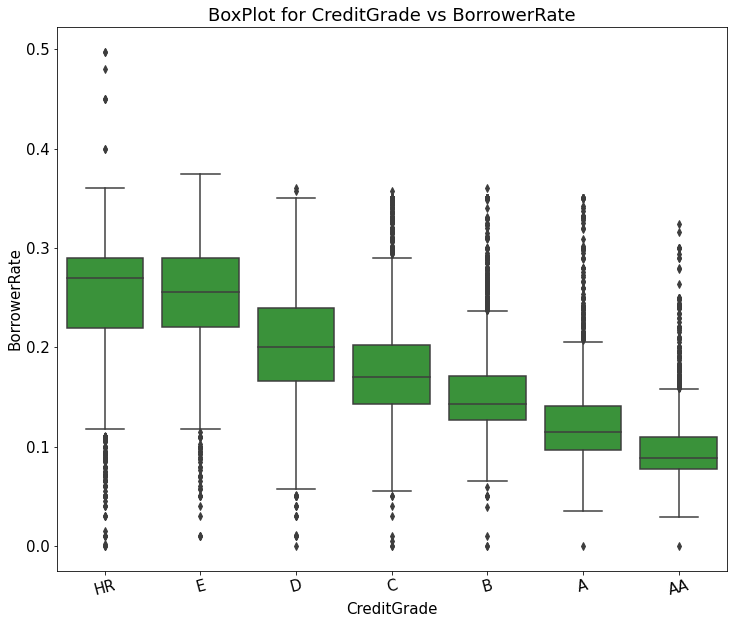

In [15]:
plt.rcParams.update({'font.size': 15})

# Initialise Plot size
plt.figure(figsize = [12, 10])
base_color = sb.color_palette()[2]

# Plot
ax1 = sb.boxplot(data=loan_df, x='CreditGrade', y='BorrowerRate', color=base_color)
plt.title("BoxPlot for CreditGrade vs BorrowerRate")
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim());

### Insight

When comparing numerical variable `BorrowerRate` vs categorical variable `CreditGrade` on a boxplot, the medians and inter-quartile ranges for BorrowerRate reduced as CreditGrades moved towards higher Credit Score classes (HR - AA). The Median values of `BorrowerRate` also decrease from Class HR through Class AA. This could mean that the Borrower Interest Rates are usually lower for higher ranked `CreditGrade` classes. I intend to carry this finding forward into the explanatory analysis

Features `CreditGrade` & `BorrowerRate` give insight into how a Loan borrower's Credit Score/ `CreditGrade` could impact their Loan's interest rates. These features exhibited a negative correlation as it was observed that the higher a borrower's Credit Score the lower the interest rates they receive in their loans.

## Investigating the relationship between a Loan Borrower's Amount Borrowed and Interest Rate given.

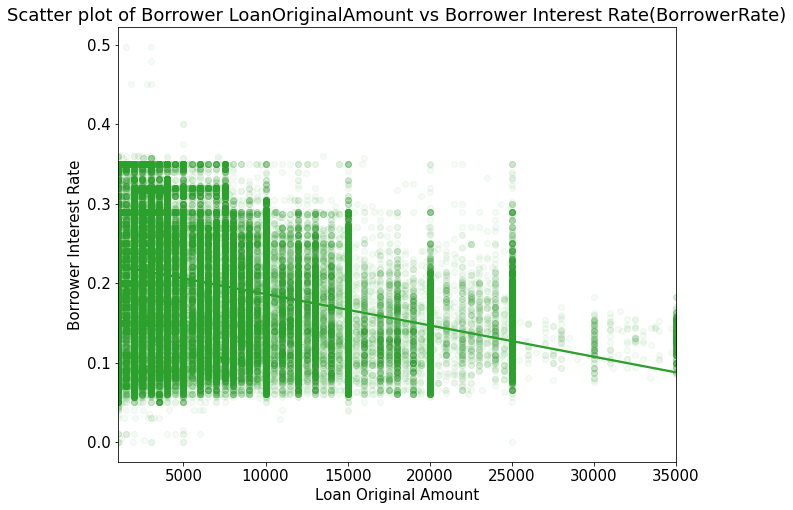

In [20]:
# Scatter plot of LoanOriginalAmount vs Borrower Rate
plt.figure(figsize=[10, 8])
sb.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':1/20}, color=base_color);
plt.title("Scatter plot of Borrower LoanOriginalAmount vs Borrower Interest Rate(BorrowerRate)")
plt.ylabel('Borrower Interest Rate')
plt.xlabel('Loan Original Amount');

The features `LoanOriginalAmount` & `BorrowerRate` exhibit a negative correlation as a borrower's borrowed LoanOriginalAmount increases, their Borrower Interest Rates often tend to decrease. This means that loans of higher amounts usually get higher Interest Rates. Borrowers of higher amounts from Prosper often get the best/lowest interest rates.

## Investigating whether Borrowers. with higher CreditScores/ProsperRating often borrow larger amounts of money.



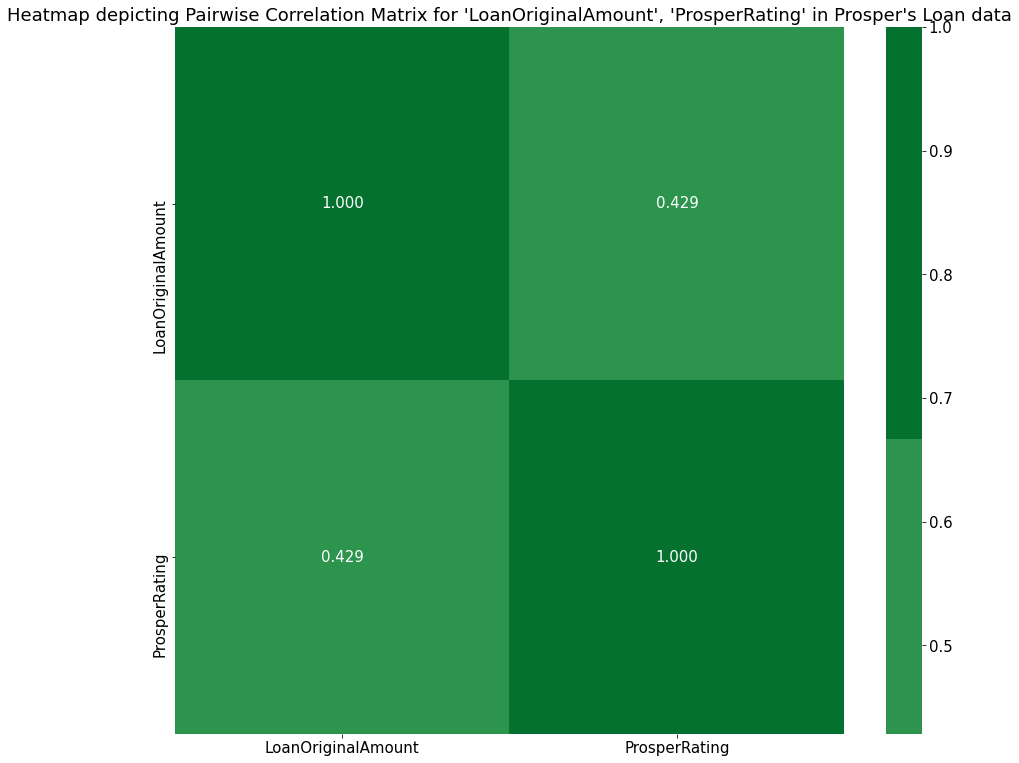

In [21]:
vars = ['LoanOriginalAmount', 'ProsperRating']

# Plotting Heatmap for Pairwise Correlation Matrix for Numeric Features of Loan Dataset
plt.figure(figsize = [15, 13])
plt.title("Heatmap depicting Pairwise Correlation Matrix for 'LoanOriginalAmount', 'ProsperRating' in Prosper's Loan data")
colormap = sb.color_palette("Greens")
sb.heatmap(loan_df[vars].corr(), annot = True, fmt = '.3f',
           cmap = colormap, center = 0);

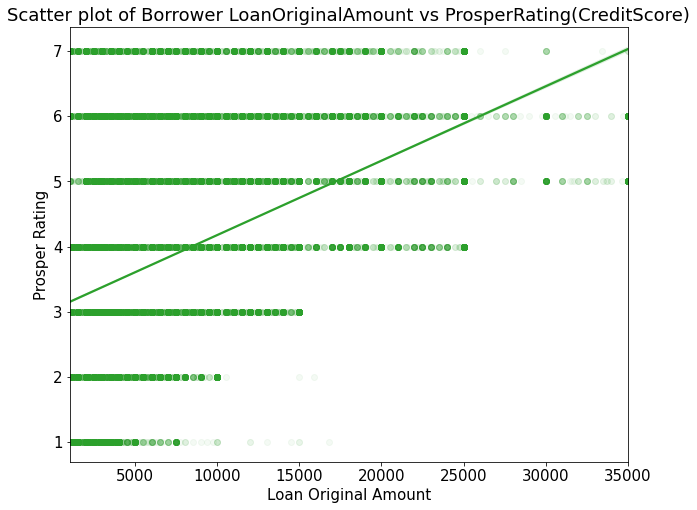

In [22]:
# Scatter plot of LoanOriginalAmount vs ProsperRating
plt.figure(figsize=[10, 8])
sb.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'ProsperRating', scatter_kws={'alpha':1/20}, color=base_color);
plt.title("Scatter plot of Borrower LoanOriginalAmount vs ProsperRating(CreditScore)")
plt.ylabel('Prosper Rating')
plt.xlabel('Loan Original Amount');

The correlation heatmap shows the variables `ProsperRating` and `LoanOriginalAmount` having a correlation coefficient of 0.429 which suggests a moderately positive correlation. The scatter plot right after the heatmap backs this finding as it shows a positive correlation between the two features.

There is evidence of positive correlation between the features `ProsperRating` which is a numerical format of the Credit Score rating and `LoanOriginalAmount` as borrowers with higher CreditScores/ ProsperRatings often borrowed large amounts of money compared to their lower rated counterparts. 

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [26]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_JoachimWambua.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_JoachimWambua.ipynb to slides
[NbConvertApp] Writing 930625 bytes to Part_II_slide_deck_JoachimWambua.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_JoachimWambua.slides.html
Use Control-C to stop this server
^C

Interrupted


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobe will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
